##**Цель**:
Изучить методы отбора признаков для эффективного обучения моделей машинного обучения.
##Описание задания:
В домашнем задании нужно решить задачу классификации точек наиболее эффективно. Для этого в работе необходимо применить различные методы по отбору признаков. Отбор признаков предпочтительнее осуществлять основываясь на математическом аппарате, поэтому данные для этого задания будут сгенерированы, чтобы избежать признаков с физическим смыслом.

**1) Сгенерируйте данные с помощью кода:**

from sklearn.datasets import make_classification

x_data_generated, 

y_data_generated = make_classification(scale=1)

In [ ]:
from sklearn.datasets import make_classification

In [ ]:
X,y = make_classification(random_state=42, scale=1)

In [ ]:
X

array([[-2.02514259,  0.0291022 , -0.47494531, ..., -0.33450124,
         0.86575519, -1.20029641],
       [ 1.61371127,  0.65992405, -0.15005559, ...,  1.37570681,
         0.70117274, -0.2975635 ],
       [ 0.16645221,  0.95057302,  1.42050425, ...,  1.18901653,
        -0.55547712, -0.63738713],
       ...,
       [-0.03955515, -1.60499282,  0.22213377, ..., -0.30917212,
        -0.46227529, -0.43449623],
       [ 1.08589557,  1.2031659 , -0.6095122 , ..., -0.3052247 ,
        -1.31183623, -1.06511366],
       [-0.00607091,  1.30857636, -0.17495976, ...,  0.99204235,
         0.32169781, -0.66809045]])

**2) Постройте модель логистической регрессии и оцените среднюю точность.** 

Для этого используйте следующий код:
cross_val_score(LogisticRegression(), x, y, scoring=‘accuracy’).mean()

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(LogisticRegression(random_state = 42), X, y, scoring='accuracy').mean()

0.9800000000000001

**3)Используйте статистические методы для отбора признаков:**

a) Выберите признаки на основе матрицы корреляции.

b) Отсеките низковариативные признаки (VarianceThreshold).

c) Повторите п. 2 на отобранных признаках в п. 3a, п. 3b.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

In [ ]:
corr = (pd.DataFrame(X)).corr()

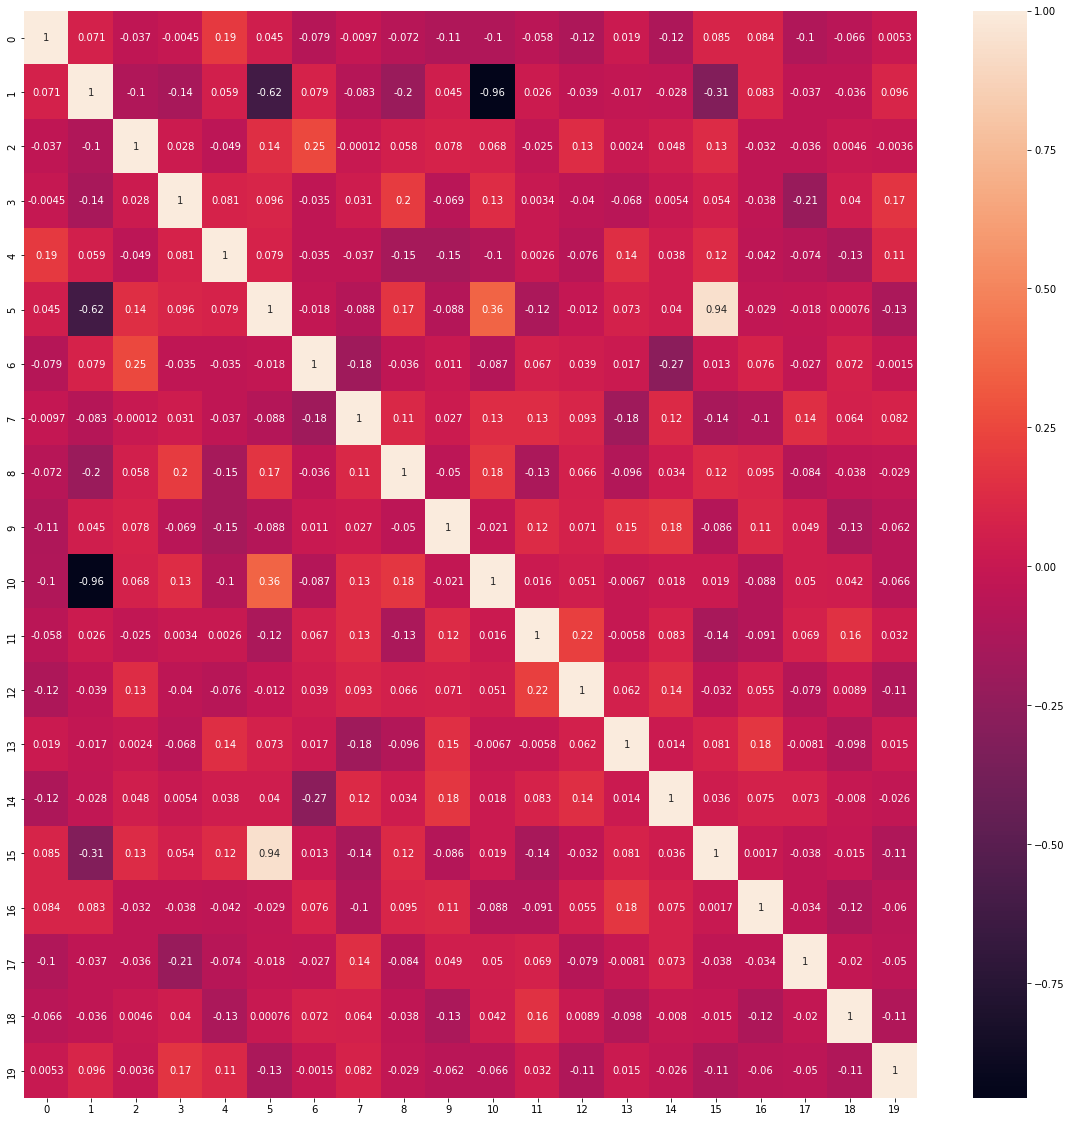

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)

Видим что есть сильная корреляция между признаками 15, 5 и так же у признака 1 есть сильная отрицательная корреляция с признаками 5 и 10. Удалим по одному признаку которые между собой коррелируют

In [ ]:
x2 = np.delete(X, [1,15], axis = 1)

In [ ]:
corr2 = (pd.DataFrame(x2)).corr()

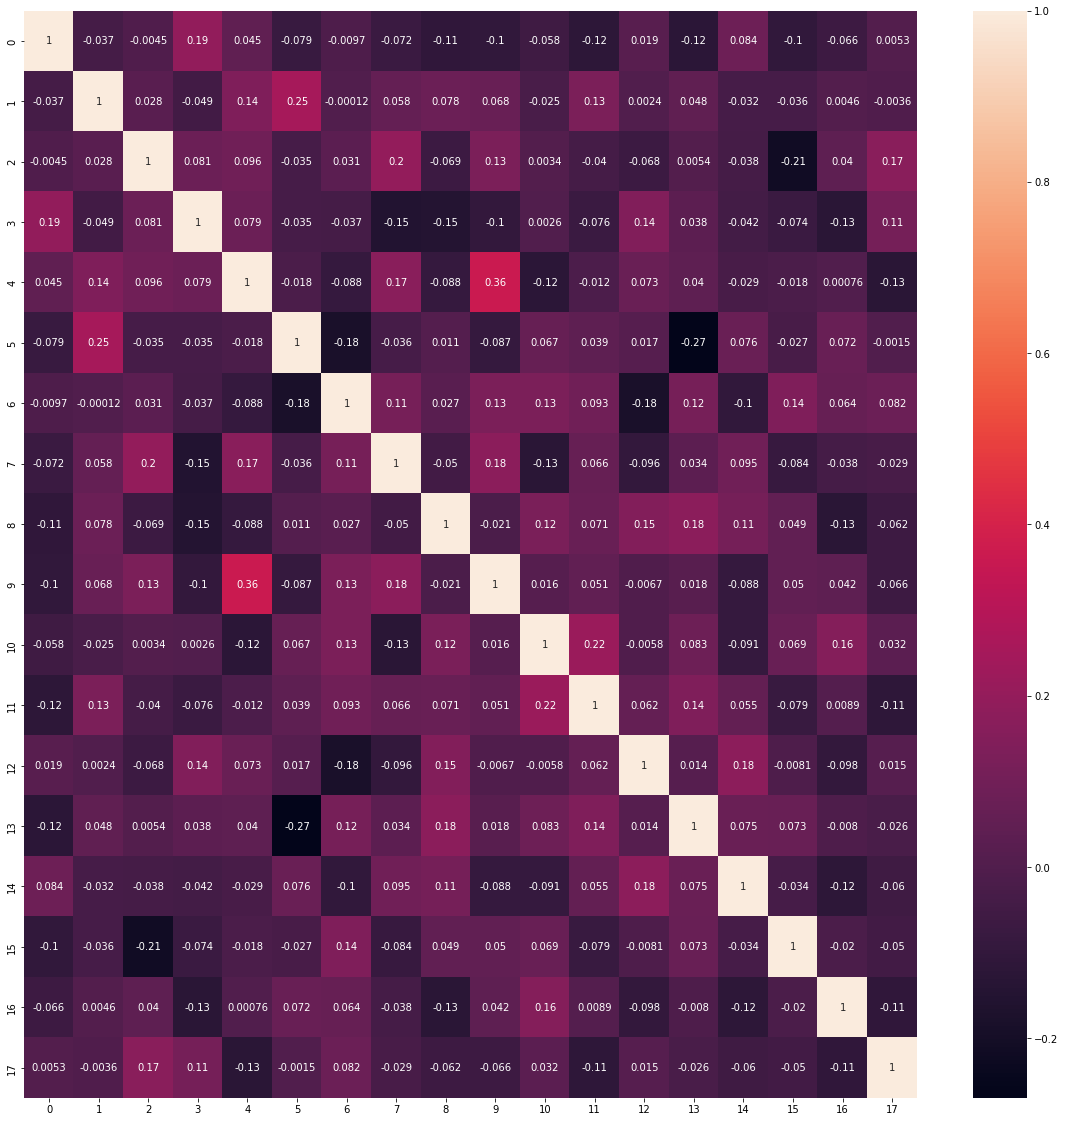

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(corr2,annot=True)

In [ ]:
cross_val_score(LogisticRegression(random_state = 42), x2, y, scoring='accuracy').mean()

0.96

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
sel = VarianceThreshold()
X2 = sel.fit_transform(X)

In [ ]:
X2.shape

(100, 20)

In [ ]:
cross_val_score(LogisticRegression(random_state = 42), X2, y, scoring='accuracy').mean()

0.9800000000000001

**4)Осуществите отбор признаков на основе дисперсионного анализа:**

a) Выберите 5 лучших признаков с помощью скоринговой функции для классификации f_classif (SelectKBest(f_classif, k=5)).

b) Повторите п. 2 на отобранных признаках.

In [ ]:
from sklearn.feature_selection import SelectKBest

In [ ]:
X_new = SelectKBest(k=5).fit_transform(X,y)

In [ ]:
cross_val_score(LogisticRegression(random_state = 42), X_new, y, scoring='accuracy').mean()

0.9800000000000001

**5) Отбор с использованием моделей:**

a) Реализуйте отбор признаков с помощью логистической регрессии. Отобранные признаки подайте далее на вход в саму логистическую регрессию (SelectFromModel). Используйте L1 регуляризацию.

b) Реализуйте отбор признаков с помощью модели RandomForest и встроенного атрибута feature_impotance.

c) Повторите п. 2 на отобранных признаках в п. 5a, п. 5b.

In [ ]:
from sklearn.feature_selection import SelectFromModel

In [ ]:
lr = LogisticRegression(penalty="l1",random_state= 42,solver = 'liblinear', dual=False).fit(X, y)

In [ ]:
model = SelectFromModel(lr, prefit=True)
X_lr = model.transform(X)
X_lr.shape

(100, 9)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
rfc.fit(X, y)
rfc.feature_importances_  

array([0.0188774 , 0.25007191, 0.0091867 , 0.02228223, 0.02793404,
       0.03096303, 0.02446313, 0.0188212 , 0.02743287, 0.0093798 ,
       0.39656907, 0.01984165, 0.01143834, 0.01469519, 0.01033344,
       0.05984026, 0.00922282, 0.01388401, 0.01191398, 0.01284891])

In [ ]:
model = SelectFromModel(rfc, prefit=True)
X_for = model.transform(X)
X_for.shape 

(100, 3)

In [ ]:
cross_val_score(LogisticRegression(random_state = 42), X_lr, y, scoring='accuracy').mean()

0.9800000000000001

In [ ]:
cross_val_score(LogisticRegression(random_state = 42), X_for, y, scoring='accuracy').mean()

0.9800000000000001

**6)Перебор признаков:**

a) SequentialFeatureSelector.

b) Повторите п. 2 на отобранных признаках.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
sfs = SequentialFeatureSelector(knn, n_features_to_select=5)

In [ ]:
sfs.fit(X, y)

SequentialFeatureSelector(estimator=KNeighborsClassifier(),
                          n_features_to_select=5)

In [ ]:
X_sfs = sfs.transform(X)

In [ ]:
X_sfs.shape

(100, 5)

In [ ]:
cross_val_score(LogisticRegression(random_state = 42), X_sfs, y, scoring='accuracy').mean()

0.99

**7)Сформулируйте выводы по проделанной работе:**

a) Сделайте таблицу вида |способ выбора признаков|количество признаков|средняя точность модели|.

In [ ]:
tabl = [['без отбора признаков', X.shape[1],cross_val_score(LogisticRegression(random_state = 42), X, y, scoring='accuracy').mean()],
        ['корреляция', x2.shape[1],cross_val_score(LogisticRegression(random_state = 42), x2, y, scoring='accuracy').mean()],
        ['VarianceThreshold',X2.shape[1],cross_val_score(LogisticRegression(random_state = 42), X2, y, scoring='accuracy').mean()],
        ['SelectKBest',X_new.shape[1],cross_val_score(LogisticRegression(random_state = 42), X_new, y, scoring='accuracy').mean()],
        ['LogisticRegression',X_lr.shape[1],cross_val_score(LogisticRegression(random_state = 42), X_lr, y, scoring='accuracy').mean()],
        ['RandomForestClassifier',X_for.shape[1],cross_val_score(LogisticRegression(random_state = 42), X_for, y, scoring='accuracy').mean()],
        ['SequentialFeatureSelector',X_sfs.shape[1],cross_val_score(LogisticRegression(random_state = 42), X_sfs, y, scoring='accuracy').mean()]]

In [ ]:
df = pd.DataFrame(tabl, columns=['способ выбора признаков','количество признаков','средняя точность модели'])

In [ ]:
df.sort_values(by='средняя точность модели',ascending=False)

,способ выбора признаков,количество признаков,средняя точность модели
6,SequentialFeatureSelector,5,0.99
0,без отбора признаков,20,0.98
2,VarianceThreshold,20,0.98
3,SelectKBest,5,0.98
4,LogisticRegression,9,0.98
5,RandomForestClassifier,3,0.98
1,корреляция,18,0.96


**Вывод:**

Из всех способов отбора признаков, прирост показателя метрики, только у способа отбора признаков SequentialFeatureSelector , отбор признаков по корреляции, ухудшил метрики модели, остальные давали показатели не отличающиеся от обучения на первоначальных признаках.